# Packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf
import yahoofinancials
import seaborn as sn
from scipy.stats import anderson,kstest,shapiro, probplot
 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

*Discrete Return*
Misal $S(t)$ adalah di saham pada saat $t$ maka *return* diperoleh sebagai berikut 
\begin{equation}
\frac{S(t+\Delta t)-S(t)}{S(t)}
\end{equation}

In [2]:
stock = 'TLKM.JK'
df = yf.Ticker(stock).history(period = '1y')
df['return'] = df['Close'].pct_change()
df['return']

Date
2021-01-21         NaN
2021-01-22   -0.025862
2021-01-25   -0.005900
2021-01-26   -0.032641
2021-01-27    0.036810
                ...   
2022-01-17   -0.002387
2022-01-18    0.016746
2022-01-19    0.000000
2022-01-20   -0.007059
2022-01-21    0.011848
Name: return, Length: 249, dtype: float64

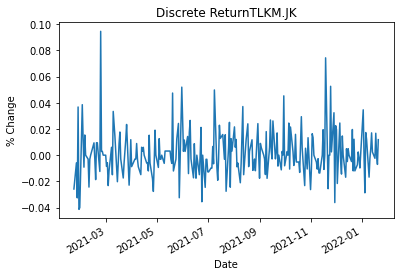

In [3]:
df['return'].plot()
plt.ylabel('% Change')
plt.title('Discrete Return'+ stock)
plt.show()

Log Return didefinisikan sebagai berikut :
\begin{equation} 
\ln\left(\frac{S(t+\Delta t)}{S(t)}\right)
\end{equation}

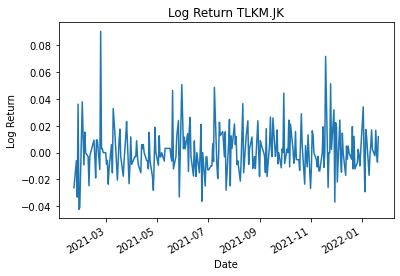

In [4]:
df['log_return'] = np.log(df['Close']) - np.log(df['Close'].shift(1))
df['log_return'].plot()
plt.ylabel('Log Return')
plt.title('Log Return ' + stock)
plt.show()

Di kalkulus dipelajari bahwa 
\begin{align*}
\ln(1+x) = x - \frac{x^2}{2} + \frac{x^3}{3} - \dots 
\end{align*}
Sehingga dapat ditinjau pula persamaan 
\begin{align*}
\ln\left(\frac{S(t+\Delta t)}{S(t)}\right)= \ln\left(\frac{S(t+\Delta t)-S(t)+S(t)}{S(t)}\right) = \ln\left(1+\frac{S(t+\Delta t)-S(t)}{S(t)}\right) \approx \frac{S(t+\Delta t)-S(t)}{S(t)}
\end{align*}
untuk suatu nilai $\frac{S(t+\Delta t) - S(t)}{S(t)}$ yang kecil

# Distribusi dari *Return* dan *Log Return*

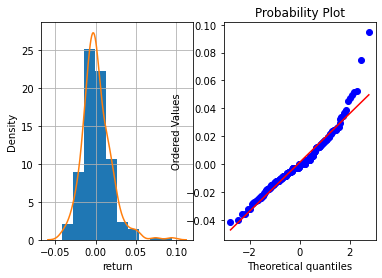

In [5]:
ax1 = plt.subplot(121)
df['return'].hist(density = True)
sn.kdeplot(df['return'])
ax2 = plt.subplot(122)
probplot(df['return'].dropna(), plot= plt)

plt.show()

In [6]:
print('Return mean :', np.round(df['return'].mean(),6))
print('Return variance :', np.round(df.var()['return'],6))

Return mean : 0.001182
Return variance : 0.000323


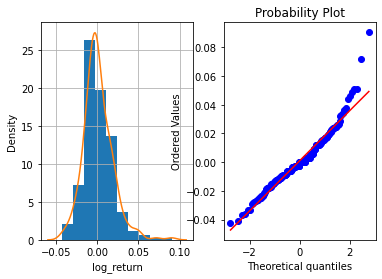

In [7]:
ax1 = plt.subplot(121)
df['log_return'].hist(density = True)
sn.kdeplot(df['log_return'])
ax2 = plt.subplot(122)
probplot(df['log_return'].dropna(), plot= plt)

plt.show()

In [8]:
print('Return mean :', np.round(df['log_return'].mean(),6))
print('Return variance :', np.round(df.var()['log_return'],6))

Return mean : 0.001023
Return variance : 0.000316
